In [135]:
# load k_lines

from datetime import date, timedelta
from binance.binance_k_line_repository import load_k_lines

interval_days = 1
interval_minutes = interval_days * 24 * 60
interval_date_from: date = date.today() - timedelta(days=3 + interval_days - 1)
interval_date_to: date = date.today() - timedelta(days=3)

symbol: str = "ETHUSDT"

k_lines_raw = load_k_lines(symbol, interval_date_from, interval_date_to)

display(k_lines_raw)

,open_timestamp_millis,open_price,high_price,low_price,close_price,volume,close_timestamp_millis,quote_asset_volume,trades_count,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1685318400000,1908.36,1910.46,1907.71,1910.45,6023.758,1685318459999,1.150184e+07,4106,3829.044,7.311417e+06,0
1,1685318460000,1910.46,1911.17,1909.46,1910.02,5322.515,1685318519999,1.016761e+07,3259,2844.897,5.434698e+06,0
2,1685318520000,1910.02,1911.18,1908.75,1909.23,6140.385,1685318579999,1.172827e+07,4307,1922.260,3.671799e+06,0
3,1685318580000,1909.24,1910.13,1909.09,1910.13,780.004,1685318639999,1.489379e+06,1278,409.456,7.818626e+05,0
4,1685318640000,1910.13,1910.48,1908.91,1909.59,1667.652,1685318699999,3.184574e+06,2109,646.615,1.234699e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1685404500000,1891.76,1892.37,1891.75,1892.37,1465.613,1685404559999,2.772939e+06,924,1275.371,2.413016e+06,0
1436,1685404560000,1892.37,1892.51,1891.69,1891.69,649.350,1685404619999,1.228717e+06,753,194.772,3.685513e+05,0
1437,1685404620000,1891.69,1891.70,1891.40,1891.40,313.432,1685404679999,5.928521e+05,477,134.275,2.539755e+05,0
1438,1685404680000,1891.41,1891.70,1891.40,1891.53,320.283,1685404739999,6.058215e+05,508,186.007,3.518262e+05,0


In [136]:
# filter raw data

import pandas as pd

k_lines = k_lines_raw[["open_price", "low_price", "high_price", "close_price"]]
k_lines.index = pd.to_datetime(k_lines_raw["open_timestamp_millis"], unit="ms")
k_lines.index.name = "open_datetime"

k_lines

,open_price,low_price,high_price,close_price
open_datetime,,,,
2023-05-29 00:00:00,1908.36,1907.71,1910.46,1910.45
2023-05-29 00:01:00,1910.46,1909.46,1911.17,1910.02
2023-05-29 00:02:00,1910.02,1908.75,1911.18,1909.23
2023-05-29 00:03:00,1909.24,1909.09,1910.13,1910.13
2023-05-29 00:04:00,1910.13,1908.91,1910.48,1909.59
...,...,...,...,...
2023-05-29 23:55:00,1891.76,1891.75,1892.37,1892.37
2023-05-29 23:56:00,1892.37,1891.69,1892.51,1891.69
2023-05-29 23:57:00,1891.69,1891.40,1891.70,1891.40


In [137]:
# validate filtered raw data

from numpy import float16, float64


assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["open_price"] == float64
assert len(k_lines[k_lines["open_price"] < 0]) == 0

assert k_lines.dtypes["low_price"] == float64
assert len(k_lines[k_lines["low_price"] < 0]) == 0

assert k_lines.dtypes["high_price"] == float64
assert len(k_lines[k_lines["high_price"] < 0]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] < 0]) == 0

# TODO check ordering and increment == 1

<Axes: xlabel='open_datetime'>

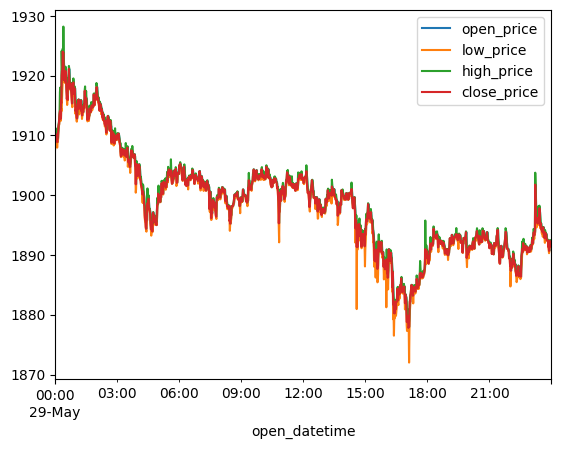

In [138]:
# Prices plot

k_lines.plot.line(use_index=True)

In [139]:
k_lines_featured = k_lines.copy()
k_lines_featured["close_price_mean_10m"] = (
    k_lines_featured["close_price"].shift(1).rolling(10).mean()
)

display(k_lines_featured.head(30))

,open_price,low_price,high_price,close_price,close_price_mean_10m
open_datetime,,,,,
2023-05-29 00:00:00,1908.36,1907.71,1910.46,1910.45,NaN
2023-05-29 00:01:00,1910.46,1909.46,1911.17,1910.02,NaN
2023-05-29 00:02:00,1910.02,1908.75,1911.18,1909.23,NaN
2023-05-29 00:03:00,1909.24,1909.09,1910.13,1910.13,NaN
2023-05-29 00:04:00,1910.13,1908.91,1910.48,1909.59,NaN
2023-05-29 00:05:00,1909.59,1909.01,1909.94,1909.12,NaN
2023-05-29 00:06:00,1909.12,1907.95,1909.95,1908.87,NaN
2023-05-29 00:07:00,1908.88,1908.87,1909.49,1909.00,NaN
2023-05-29 00:08:00,1909.00,1908.90,1910.00,1909.99,NaN
